### Data Integrity Review for Sector I

Particularly in this case, when the actual project was carried out, I participated from the beginning in the data collection and loading process. Therefore, there were no visible errors such as missing data or incorrect data types.

It is worth noting that the demographic nature of the sector is purely industrial, with wide roads for quick access by heavy vehicles, heavy traffic, and numerous outsiders who cannot be identified.

-----------------------------------------------------------------------------------------------------------------------

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'crimes_csv/zone_i_crimes_locations.csv'
df = pd.read_csv(file_path, delimiter=',')

print(df.head())

         name  armed robbery  car theft  snatch theft  minor injuries  \
0  complaint1              0          0             0               0   
1  complaint2              0          0             0               0   
2  complaint3              0          0             0               0   
3  complaint4              0          0             0               0   
4  complaint5              0          0             0               0   

   robbery  serious injuries  theft  vandalism        date   latitude  \
0        0                 0      1          0  12/09/2014 -31.435038   
1        2                 0      2          0  19/12/2018 -31.440724   
2        2                 0      2          1  20/07/2017 -31.444826   
3        1                 0      0          2  04/04/2010 -31.449413   
4        0                 0      1          2  24/02/2017 -31.448212   

   longitude  
0 -64.250222  
1 -64.250138  
2 -64.251266  
3 -64.250803  
4 -64.249740  


In [23]:
nan_null_count = df.isnull().sum()
print("Count of NaN or null values per column:")
print(nan_null_count)

columns_all_zero = [col for col in df.columns if (df[col] == 0).all()]
print("\nColumns with all values equal to 0:")
print(columns_all_zero)

Count of NaN or null values per column:
name                0
armed robbery       0
car theft           0
snatch theft        0
minor injuries      0
robbery             0
serious injuries    0
theft               0
vandalism           0
date                0
latitude            0
longitude           0
dtype: int64

Columns with all values equal to 0:
['armed robbery', 'car theft', 'snatch theft', 'minor injuries', 'serious injuries']


-----------------------------------------------------------------------------------------------------------------------

At this point, *IF WE WANTED TO REVIEW THE ACTUAL DATA* (the data used here is modified for legal reasons and as an example replicating the problem), it is important to evaluate if there is a totality of "0" values. Referring to the criminal data loading system of some Argentine provinces, this would imply that we made a mistake when consulting the prosecutor's office, UJ, or the police data storage system.

-----------------------------------------------------------------------------------------------------------------------

In [24]:
columns_to_exclude = ['name', 'date', 'latitude', 'longitude']
columns_to_consider = [col for col in df.columns if col not in columns_to_exclude]

columns_with_non_zero_data = [col for col in columns_to_consider if (df[col] != 0).any()]

df_with_non_zero_data = df[columns_with_non_zero_data]

descriptive_statistics = df_with_non_zero_data.describe(include='all')

print("\nDescriptive statistics of columns with non-zero values:")
print(descriptive_statistics)


Descriptive statistics of columns with non-zero values:
         robbery      theft  vandalism
count  50.000000  50.000000  50.000000
mean    1.060000   1.120000   0.900000
std     0.818411   0.798979   0.762648
min     0.000000   0.000000   0.000000
25%     0.000000   0.250000   0.000000
50%     1.000000   1.000000   1.000000
75%     2.000000   2.000000   1.000000
max     2.000000   2.000000   2.000000


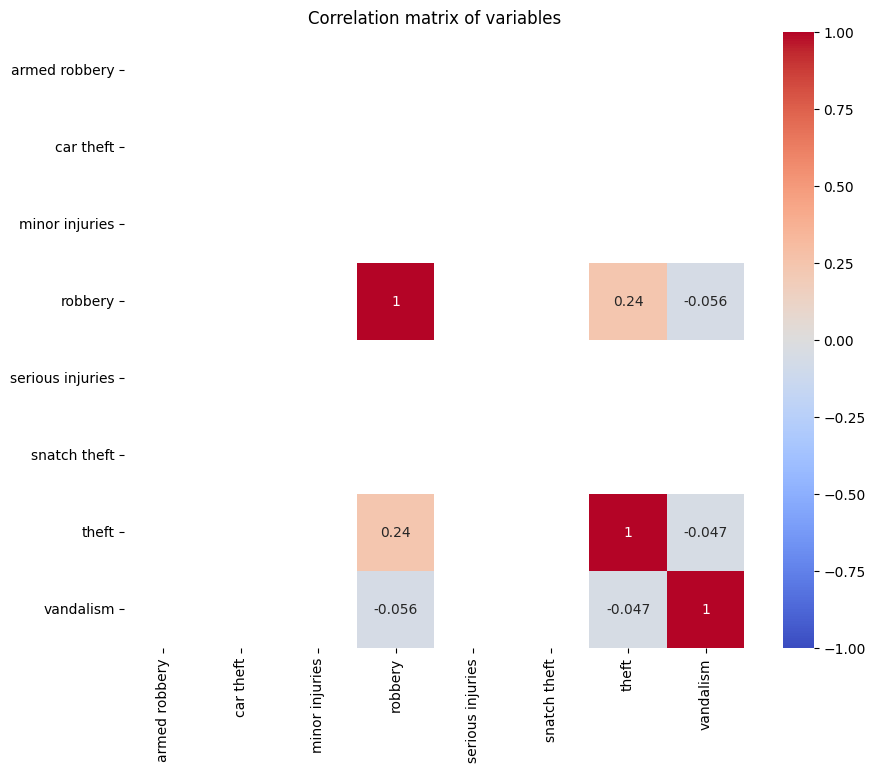

In [25]:
columns_of_interest = df.columns.difference(['name', 'date', 'latitude', 'longitude'])
df_filtered = df[columns_of_interest]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix of variables')
plt.show()

-----------------------------------------------------------------------------------------------------------------------

### Clarification:

In the context of an investigation, it is always important to investigate *CORRELATION*, as this often allows for the discovery of new criminal practices. Taking advantage of what happened in this sector, the inversely proportional relationship between robbery - vandalism or theft - vandalism is due to the fact that vandalism is used to assess the security measures of companies, as well as the response of emergency systems (police, firefighters, etc.).

In this information collection system (internal to the police institution), each "report" does not necessarily imply that all the mentioned criminal acts occurred. In reality, during that interview, the person pointed out all the incidents they experienced in that geographical and/or temporal space. Although it may seem that the quality of the data is not suitable for a proper criminal investigation, it is important for understanding the criminal activity in the area.

-----------------------------------------------------------------------------------------------------------------------

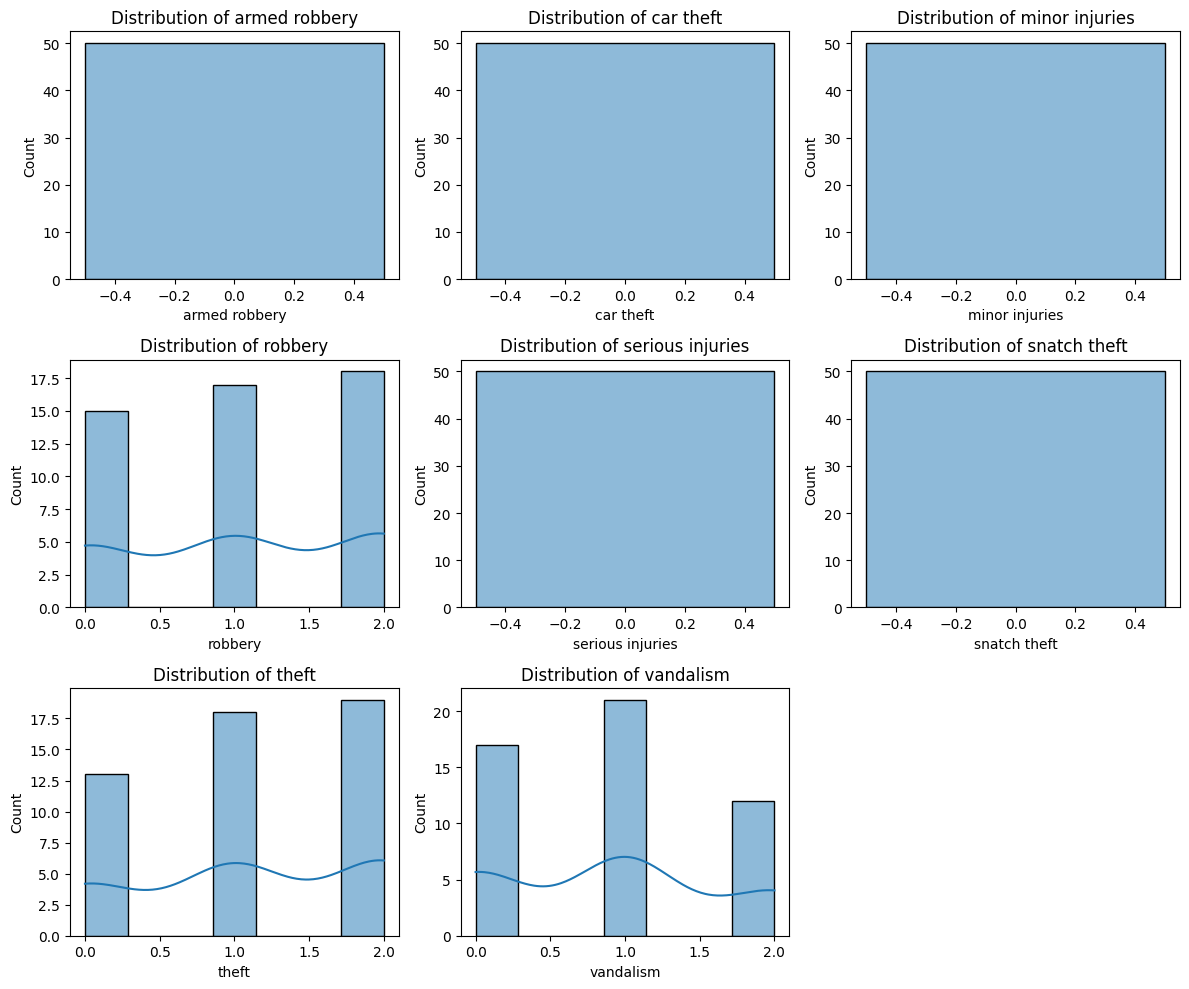

In [26]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------------------------------------

At first glance, it is difficult to perceive. Therefore, both the dates (at least a general range) and cross-referencing different data sources (Prosecutor's Office, 911, interviews) are very important elements. At first sight, acts of vandalism that occurred once are not observed; they happened in succession to test multiple targets in a single night. The repetition of vandalism implies that the target is of high quality. However, no exploitable weakness was found in the first test.

-----------------------------------------------------------------------------------------------------------------------

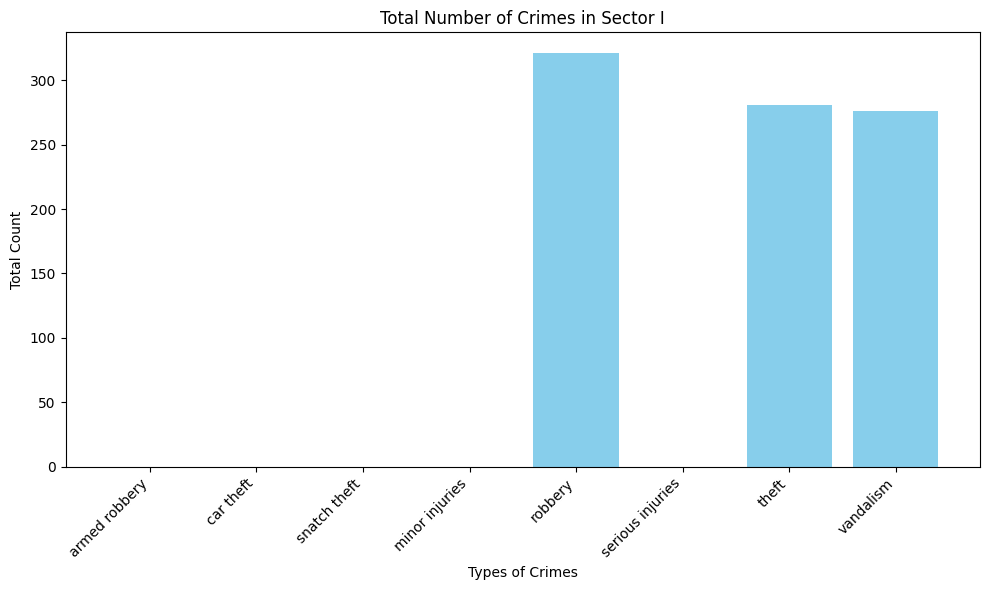

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("crimes_csv/zone_i_crimes.csv")

crime_totals = df.iloc[:, 1:-1].sum()

crime_names = df.columns[1:-1]

plt.figure(figsize=(10, 6))
plt.bar(crime_names, crime_totals, color="skyblue")
plt.xlabel("Types of Crimes")
plt.ylabel("Total Count")
plt.title("Total Number of Crimes in Sector I")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

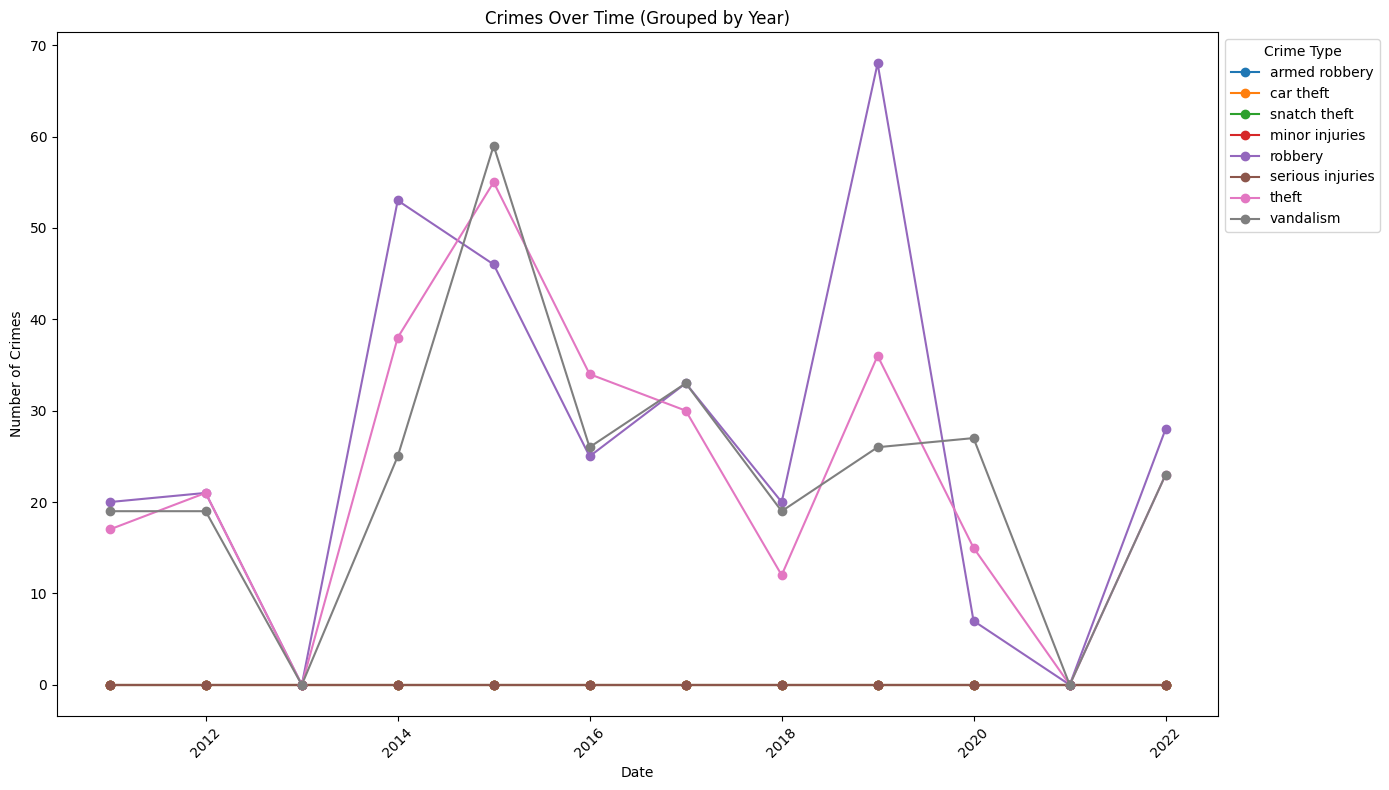

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('crimes_csv/zone_i_crimes.csv')

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df = df.drop(columns=['name'])

crimes_per_year = df.groupby(pd.Grouper(key='date', freq='Y')).sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

for column in crimes_per_year.columns[1:]:
    ax.plot(crimes_per_year['date'], crimes_per_year[column], marker='o', label=column)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')
ax.set_title('Crimes Over Time (Grouped by Year)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Crime Type')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

-----------------------------------------------------------------------------------------------------------------------

As we observe, acts of vandalism, while a real issue, are a lesser problem in comparison, because they serve as a means to an end, hence occurring in fewer numbers. From this, reactive strategies have emerged that demonstrated real efficiency in operational fields. For reasons that are not relevant here, the interruption of these strategies triggers a resurgence of crime in the area. This reveals that the cost-benefit relationship in criminal terms makes this sector very attractive.

-----------------------------------------------------------------------------------------------------------------------